In [30]:
import pandas as pd

df = pd.read_csv('/content/AAPL.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-07-17,0.332589,0.332589,0.323103,0.329241,0.280651,629552000
1,1998-07-20,0.326451,0.327009,0.316964,0.323661,0.275895,383891200
2,1998-07-21,0.322545,0.330357,0.317522,0.318080,0.271137,329504000
3,1998-07-22,0.311942,0.318080,0.305804,0.312500,0.266381,280728000
4,1998-07-23,0.310826,0.318080,0.310268,0.311942,0.265905,253131200
...,...,...,...,...,...,...,...
6034,2022-07-11,145.669998,146.639999,143.779999,144.869995,144.429443,63141600
6035,2022-07-12,145.759995,148.449997,145.050003,145.860001,145.416443,77588800
6036,2022-07-13,142.990005,146.449997,142.119995,145.490005,145.047577,71185600
6037,2022-07-14,144.080002,148.949997,143.250000,148.470001,148.018509,78140700


In [31]:
df = df[['Date','Close']]

df

,Date,Close
0,1998-07-17,0.329241
1,1998-07-20,0.323661
2,1998-07-21,0.318080
3,1998-07-22,0.312500
4,1998-07-23,0.311942
...,...,...
6034,2022-07-11,144.869995
6035,2022-07-12,145.860001
6036,2022-07-13,145.490005
6037,2022-07-14,148.470001


In [32]:
df['Date']

0       1998-07-17
1       1998-07-20
2       1998-07-21
3       1998-07-22
4       1998-07-23
           ...    
6034    2022-07-11
6035    2022-07-12
6036    2022-07-13
6037    2022-07-14
6038    2022-07-15
Name: Date, Length: 6039, dtype: object

In [33]:
import datetime

def object_to_datetime(o):
  split = o.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = object_to_datetime('1998-07-17')
datetime_object

datetime.datetime(1998, 7, 17, 0, 0)

In [34]:
df


,Date,Close
0,1998-07-17,0.329241
1,1998-07-20,0.323661
2,1998-07-21,0.318080
3,1998-07-22,0.312500
4,1998-07-23,0.311942
...,...,...
6034,2022-07-11,144.869995
6035,2022-07-12,145.860001
6036,2022-07-13,145.490005
6037,2022-07-14,148.470001


In [35]:
df['Date']=df['Date'].apply(object_to_datetime)
df['Date']

<ipython-input-35-4f98ca8f5f56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(object_to_datetime)


0      1998-07-17
1      1998-07-20
2      1998-07-21
3      1998-07-22
4      1998-07-23
          ...    
6034   2022-07-11
6035   2022-07-12
6036   2022-07-13
6037   2022-07-14
6038   2022-07-15
Name: Date, Length: 6039, dtype: datetime64[ns]

In [36]:
df.index = df.pop('Date')
df

,Close
Date,
1998-07-17,0.329241
1998-07-20,0.323661
1998-07-21,0.318080
1998-07-22,0.312500
1998-07-23,0.311942
...,...
2022-07-11,144.869995
2022-07-12,145.860001
2022-07-13,145.490005


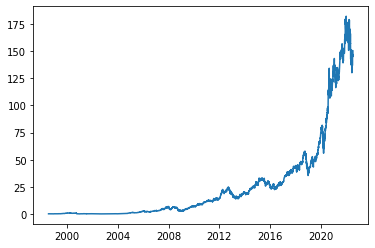

In [37]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [38]:
import numpy as np 

def three_target_list(df,first_date_str,last_date_str,n=3):
  first_date = object_to_datetime(first_date_str)
  last_date  = object_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = df.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = df.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

three_target_df=three_target_list(df,'2021-07-16','2022-07-15',n=3)

In [39]:
three_target_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-07-16,145.639999,149.149994,148.479996,146.389999
1,2021-07-19,149.149994,148.479996,146.389999,142.449997
2,2021-07-20,148.479996,146.389999,142.449997,146.149994
3,2021-07-21,146.389999,142.449997,146.149994,145.399994
4,2021-07-22,142.449997,146.149994,145.399994,146.800003
...,...,...,...,...,...
247,2022-07-11,142.919998,146.350006,147.039993,144.869995
248,2022-07-12,146.350006,147.039993,144.869995,145.860001
249,2022-07-13,147.039993,144.869995,145.860001,145.490005
250,2022-07-14,144.869995,145.860001,145.490005,148.470001


In [40]:
def X_y_date_split(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)
  
dates, X, y = X_y_date_split(three_target_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

In [42]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.01),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 118ms/step - loss: 25096.3340 - mean_absolute_error: 157.9750 - val_loss: 20414.4980 - val_mean_absolute_error: 142.7148
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 22378.0996 - mean_absolute_error: 149.0793 - val_loss: 15660.2383 - val_mean_absolute_error: 124.9491
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 14667.8174 - mean_absolute_error: 119.7238 - val_loss: 5339.3501 - val_mean_absolute_error: 72.7459
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 3372.1470 - mean_absolute_error: 52.5049 - val_loss: 498.4773 - val_mean_absolute_error: 21.2261
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 1401.0690 - mean_absolute_error: 33.7834 - val_loss: 2594.1799 - val_mean_absolute_error: 50.4704
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 723.5443 - mean_absolute_error: 22.7150 - val_loss: 57.6827 - val_me

7/7 [==============================] - 1s 4ms/step


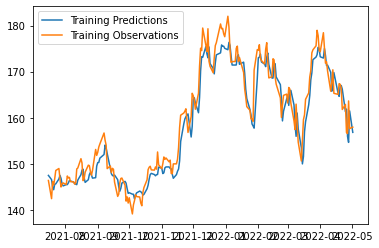

In [50]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 21ms/step


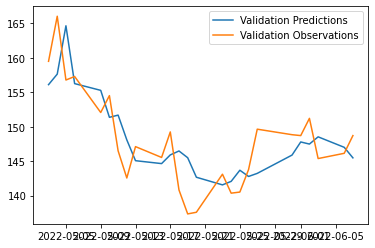

In [52]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 28ms/step


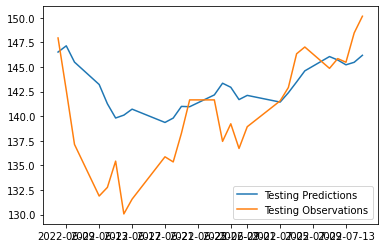

In [53]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])